In [1]:
#Author: George Nakhleh
#CSC 478: Programming Machine Learning Applications
#HW 1: Basics

In [108]:
import numpy as np
import pandas as pd

import os

os.chdir("C:\\Users\\gnakhleh\\Documents\\CSC478")

#### Read in data, get basic views

In [39]:
#read in the csv
bank_data = pd.read_csv("bank_data.csv")

#what are the df's dimensions?
bank_data.shape #12 columns, 600 rows

(600, 12)

In [4]:
#lets look at the dataframe
bank_data.head()

,id,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
0,ID12101,48,17546.0,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES
1,ID12102,40,30085.1,3,MALE,TOWN,YES,YES,NO,YES,YES,NO
2,ID12103,51,16575.4,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
3,ID12104,23,20375.4,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
4,ID12105,57,50576.3,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO


#### Columns:
id: a unique id  
age  
income  
children  
gender  
region  
married: binary (YES, NO)  
car: binary (YES, NO)  
savings_acct: binary (YES, NO)  
current_acct: binary (YES, NO)  
mortgage: binary (YES, NO)  
pep: binary (YES, NO)  

#### Question 1: Explore the general characteristics of the data, including basic statistics and distributions

In [5]:
bank_data.describe()

,age,income,children
count,600.000000,600.000000,600.000000
mean,42.395000,27524.031217,1.011667
std,14.424947,12899.468246,1.056752
min,18.000000,5014.210000,0.000000
25%,30.000000,17264.500000,0.000000
50%,42.000000,24925.300000,1.000000
75%,55.250000,36172.675000,2.000000
max,67.000000,63130.100000,3.000000


#### *Info on numeric variables*:  
#### age  
mean: \~42 years old  
standard dev.: 14.43 years  
min: 18 years old, max: 67 years old  
  
#### income  
mean:  \~\$27,524    
standard dev.: \$12,899.47  
min: \$5,014.21  
max: \$63,130.10  
  
#### children  
mean: \~1  
standard dev.: 1.05  
min: 0  
max: 3  

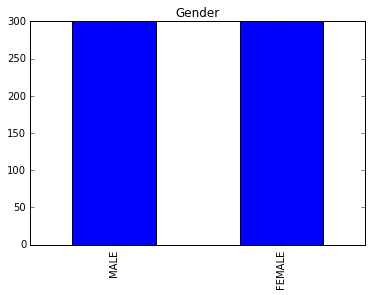

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

bank_data['gender'].value_counts().plot(kind='bar', title = 'Gender')

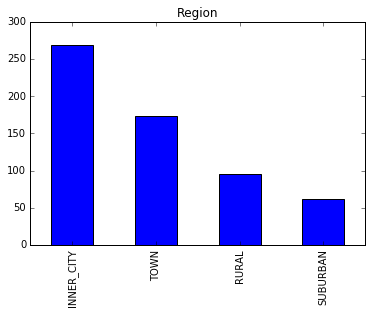

In [7]:
bank_data['region'].value_counts().plot(kind='bar', title = 'Region')

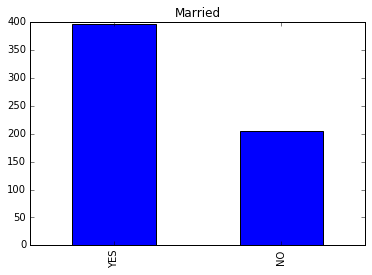

In [8]:
bank_data['married'].value_counts().plot(kind='bar', title='Married')

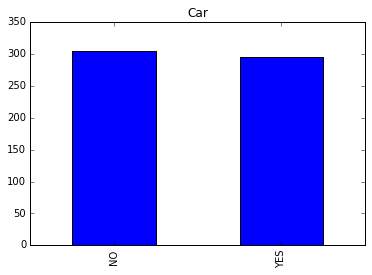

In [9]:
bank_data['car'].value_counts().plot(kind='bar', title='Car')

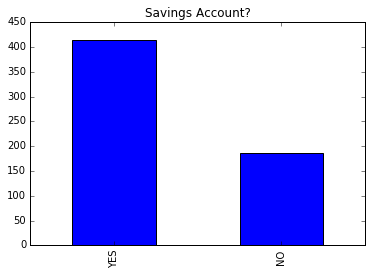

In [10]:
bank_data['savings_acct'].value_counts().plot(kind='bar', title='Savings Account?')

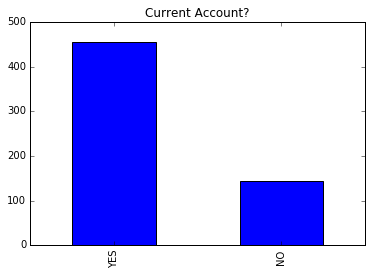

In [11]:
bank_data['current_acct'].value_counts().plot(kind='bar', title='Current Account?')

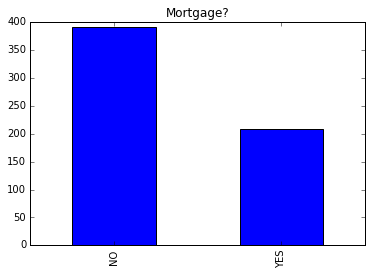

In [12]:
bank_data['mortgage'].value_counts().plot(kind='bar', title='Mortgage?')

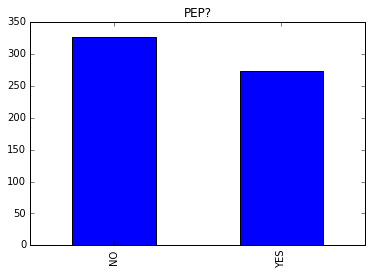

In [13]:
bank_data['pep'].value_counts().plot(kind='bar', title='PEP?')

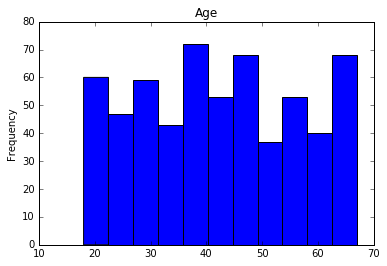

In [14]:
plt.figure()

bank_data['age'].plot.hist(bins=11, title='Age')

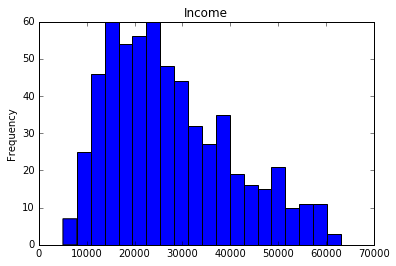

In [15]:
bank_data['income'].plot.hist(bins=20, title='Income')

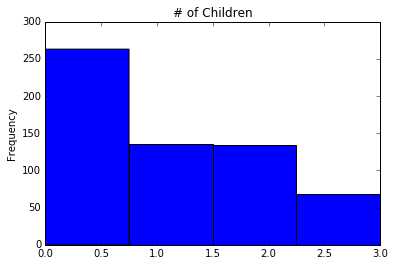

In [16]:
bank_data['children'].plot.hist(bins=4, title='# of Children')

#### Question 2: If we were interested in customers who bought PEP, we might compare that group's characteristics w/ those who *didn't* buy PEP

In [17]:
#def ct_looper(df, col, othercols):
#    for column in othercols:
#        print(pd.crosstab(index = df[col],
#                          columns= column))
#        print("\n")

#bank_column_names = list(bank_data.columns)
#bank_column_names

#bank_colname_subset = bank_column_names[3:-1]

Crosstabs, comparing those who bought PEP w/ those who didn't

In [18]:
#PEP vs Gender
pd.crosstab(index=bank_data.pep, columns = bank_data.gender).apply(lambda x: x/x.sum(), 1)

gender,FEMALE,MALE
pep,,
NO,0.521472,0.478528
YES,0.474453,0.525547


PEP buyers skew a bit more male compared to than non-PEP buyers (52% vs 49%)

In [19]:
pd.crosstab(index=bank_data.pep, columns = bank_data.region).apply(lambda x: x/x.sum(), 1)

region,INNER_CITY,RURAL,SUBURBAN,TOWN
pep,,,,
NO,0.447853,0.153374,0.085890,0.312883
YES,0.448905,0.167883,0.124088,0.259124


PEP buyers are generally pretty similar in their region breakdown to non-PEP buyers, with the exception of having fewer "TOWN" dwellers (26% vs 31%)

In [20]:
pd.crosstab(index=bank_data.pep, columns = bank_data.car).apply(lambda x: x/x.sum(), 1)

car,NO,YES
pep,,
NO,0.515337,0.484663
YES,0.496350,0.503650


In [21]:
pd.crosstab(index=bank_data.pep, columns = bank_data.mortgage).apply(lambda x: x/x.sum(), 1)

mortgage,NO,YES
pep,,
NO,0.641104,0.358896
YES,0.664234,0.335766


In [22]:
pd.crosstab(index=bank_data.pep, columns = bank_data.savings_acct).apply(lambda x: x/x.sum(), 1)

savings_acct,NO,YES
pep,,
NO,0.279141,0.720859
YES,0.346715,0.653285


In [23]:
pd.crosstab(index=bank_data.pep, columns = bank_data.current_acct).apply(lambda x: x/x.sum(), 1)

current_acct,NO,YES
pep,,
NO,0.251534,0.748466
YES,0.229927,0.770073


PEP buyers are less likely to have a savings account (65% vs. 72%)

In [24]:
bank_groupby_pep = bank_data[['age', 'income', 'children', 'pep']].groupby(['pep'])
bank_groupby_pep.aggregate(np.mean)

,age,income,children
pep,,,
NO,40.098160,24900.953374,1.067485
YES,45.127737,30644.919453,0.945255


The mean age of PEP buyers is 45, compared to 40 for non-PEP buyers. They make almost \$6000 more than non-PEP buyers (\$30,600 vs \$24,900). They have a similar number of kids.

In [25]:
pd.crosstab(index = bank_data.pep, columns = bank_data.region, 
            values = bank_data.income, aggfunc = 'mean')

region,INNER_CITY,RURAL,SUBURBAN,TOWN
pep,,,,
NO,25030.376712,27900.27680,23867.310000,23529.189020
YES,28996.756016,32339.91913,32600.277941,31465.650845


Focusing in on the income difference between PEP buyers and non-PEP buyers: This holds true across regions. The difference is most stark in "SUBURBAN" regions, approaching a \$9k difference in average income. 

#### Question 3: Use the z-score normalization to standardize income (do this as a different variable)

In [26]:
#define the new variable. Let's calculate z-score by hand
bank_data['income_normd'] = (bank_data.income - bank_data.income.mean()) / bank_data.income.std()

#show results, side-by-side w/ original variable
bank_data[['income', 'income_normd']].head(10)

,income,income_normd
0,17546.00,-0.773523
1,30085.10,0.198541
2,16575.40,-0.848766
3,20375.40,-0.554180
4,50576.30,1.787071
5,37869.60,0.802015
6,8877.07,-1.445560
7,24946.60,-0.199809
8,25304.30,-0.172079
9,24212.10,-0.256749


#### Question 4: Discretize the age attribute into 3 categories (young, mid-age, old). Do this as a different variable

In [27]:
#we need to figure out our cut-off points. Easy w/ binning. We can even add the labels we want
age_bins = pd.qcut(bank_data['age'], 3, labels = ['young', 'mid-age', 'old'])

#let's compare to see if it worked
age_bins_proto = pd.qcut(bank_data['age'], 3)

print(bank_data['age'].head(5), age_bins_proto.head(5) , age_bins.head(5))

0    48
1    40
2    51
3    23
4    57
Name: age, dtype: int64 0    (35, 49]
1    (35, 49]
2    (49, 67]
3    [18, 35]
4    (49, 67]
Name: age, dtype: category
Categories (3, object): [[18, 35] < (35, 49] < (49, 67]] 0    mid-age
1    mid-age
2        old
3      young
4        old
Name: age, dtype: category
Categories (3, object): [young < mid-age < old]


In [28]:
bank_data['age_binned'] = age_bins

bank_data[['age', 'age_binned']].head(8)

,age,age_binned
0,48,mid-age
1,40,mid-age
2,51,old
3,23,young
4,57,old
5,57,old
6,22,young
7,58,old


#### Question 5: Use Min-Max Normalization to transform the values of all numeric attirbutes in the original table (income, age, children) into 0.0 - 1.0 values

In [29]:
bank_data.columns

Index(['id', 'age', 'income', 'children', 'gender', 'region', 'married', 'car',
       'savings_acct', 'current_acct', 'mortgage', 'pep', 'income_normd',
       'age_binned'],
      dtype='object')

In [30]:
#let's make an 'original dataset', without those two new columns we added
bank_data_new = bank_data
bank_data = bank_data.drop(bank_data.columns[[-1, -2]], axis=1)

print(bank_data.columns, '\n', bank_data_new.columns)

Index(['id', 'age', 'income', 'children', 'gender', 'region', 'married', 'car',
       'savings_acct', 'current_acct', 'mortgage', 'pep'],
      dtype='object') 
 Index(['id', 'age', 'income', 'children', 'gender', 'region', 'married', 'car',
       'savings_acct', 'current_acct', 'mortgage', 'pep', 'income_normd',
       'age_binned'],
      dtype='object')


In [40]:
#normalize each variable
income_scaled = (bank_data['income'] - bank_data['income'].min()) / (bank_data['income'].max() - bank_data['income'].min())
age_scaled = (bank_data['age'] - bank_data['age'].min()) / (bank_data['age'].max() - bank_data['age'].min())
children_scaled = (bank_data['children'] - bank_data['children'].min()) / (bank_data['children'].max() - bank_data['children'].min())

#make sure it works (exact same formula for all three, so if works once, should be all ok)
print(income_scaled.head(4), '\n', bank_data['income'].head(4))


0    0.215634
1    0.431395
2    0.198933
3    0.264320
Name: income, dtype: float64 
 0    17546.0
1    30085.1
2    16575.4
3    20375.4
Name: income, dtype: float64


In [41]:
bank_data_normalized = bank_data.copy()
bank_data_normalized.income = income_scaled
bank_data_normalized.age = age_scaled
bank_data_normalized.children = children_scaled

bank_data_normalized.head(5)

,id,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
0,ID12101,0.612245,0.215634,0.333333,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES
1,ID12102,0.448980,0.431395,1.000000,MALE,TOWN,YES,YES,NO,YES,YES,NO
2,ID12103,0.673469,0.198933,0.000000,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
3,ID12104,0.102041,0.264320,1.000000,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
4,ID12105,0.795918,0.783987,0.000000,FEMALE,RURAL,YES,NO,YES,NO,NO,NO


#### Question 6: Convert the table into standard spreadsheet format. Involves categorical variables into multiple binaries. Save this as 'bank_numeric.csv' and submit w/ assignment 

In [58]:
#Use get_dummies to convert categorical columns to dummy variables
#Before that, let's turn the id column into the index

bank_numeric = pd.get_dummies(bank_data_normalized.ix[:, 1:])

bank_numeric.index = bank_data_normalized['id']

bank_numeric.head(5)

,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,...,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES,pep_NO,pep_YES
id,,,,,,,,,,,,,,,,,,,,,
ID12101,0.612245,0.215634,0.333333,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
ID12102,0.448980,0.431395,1.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
ID12103,0.673469,0.198933,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
ID12104,0.102041,0.264320,1.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
ID12105,0.795918,0.783987,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0


In [59]:
bank_data_normalized.shape

(600, 12)

In [60]:
bank_numeric.columns

Index(['age', 'income', 'children', 'gender_FEMALE', 'gender_MALE',
       'region_INNER_CITY', 'region_RURAL', 'region_SUBURBAN', 'region_TOWN',
       'married_NO', 'married_YES', 'car_NO', 'car_YES', 'savings_acct_NO',
       'savings_acct_YES', 'current_acct_NO', 'current_acct_YES',
       'mortgage_NO', 'mortgage_YES', 'pep_NO', 'pep_YES'],
      dtype='object')

In [61]:
#write out this df to csv
bank_numeric.to_csv('bank_numeric.csv')

#### Question 7: Using the standardized dataset perform correlation analysis on the attributes. Discuss results.

In [64]:
#Make correlation matrix
corr_matrix = bank_numeric.corr()
corr_matrix

,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,...,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES,pep_NO,pep_YES
age,1.000000,0.752726,0.023572,0.090081,-0.090081,-0.025171,0.018635,0.031345,-0.008510,-0.010394,...,-0.077733,0.077733,-0.184389,0.184389,0.035312,-0.035312,0.016154,-0.016154,-0.173825,0.173825
income,0.752726,1.000000,0.036761,0.023845,-0.023845,-0.047564,0.084776,0.029824,-0.036431,0.008386,...,-0.081556,0.081556,-0.266164,0.266164,-0.031616,0.031616,0.014662,-0.014662,-0.221991,0.221991
children,0.023572,0.036761,1.000000,0.014206,-0.014206,-0.051222,0.089902,-0.014122,-0.007033,0.048716,...,-0.036455,0.036455,-0.041536,0.041536,-0.006238,0.006238,0.074339,-0.074339,0.057663,-0.057663
gender_FEMALE,0.090081,0.023845,0.014206,1.000000,-1.000000,-0.023459,-0.009092,-0.010951,0.040472,0.021110,...,0.006667,-0.006667,0.007207,-0.007207,-0.019466,0.019466,0.066465,-0.066465,0.046843,-0.046843
gender_MALE,-0.090081,-0.023845,-0.014206,-1.000000,1.000000,0.023459,0.009092,0.010951,-0.040472,-0.021110,...,-0.006667,0.006667,-0.007207,0.007207,0.019466,-0.019466,-0.066465,0.066465,-0.046843,0.046843
region_INNER_CITY,-0.025171,-0.047564,-0.051222,-0.023459,0.023459,1.000000,-0.393444,-0.306032,-0.573814,-0.003254,...,0.018143,-0.018143,0.091373,-0.091373,-0.007894,0.007894,-0.002098,0.002098,-0.001054,0.001054
region_RURAL,0.018635,0.084776,0.089902,-0.009092,0.009092,-0.393444,1.000000,-0.148158,-0.277798,0.022649,...,-0.024006,0.024006,-0.036960,0.036960,0.008496,-0.008496,0.051908,-0.051908,-0.019714,0.019714
region_SUBURBAN,0.031345,0.029824,-0.014122,-0.010951,0.010951,-0.306032,-0.148158,1.000000,-0.216080,-0.012483,...,0.061184,-0.061184,-0.002605,0.002605,-0.038157,0.038157,-0.004635,0.004635,-0.062508,0.062508
region_TOWN,-0.008510,-0.036431,-0.007033,0.040472,-0.040472,-0.573814,-0.277798,-0.216080,1.000000,-0.006369,...,-0.041604,0.041604,-0.068654,0.068654,0.027431,-0.027431,-0.036591,0.036591,0.059115,-0.059115
married_NO,-0.010394,0.008386,0.048716,0.021110,-0.021110,-0.003254,0.022649,-0.012483,-0.006369,1.000000,...,-0.009571,0.009571,0.028604,-0.028604,-0.059996,0.059996,-0.021711,0.021711,-0.189578,0.189578


In [66]:
#Get quicker answers than reading it
#Sort

corr_matrix['age'].sort_values(ascending = False)

age                  1.000000
income               0.752726
savings_acct_YES     0.184389
pep_YES              0.173825
gender_FEMALE        0.090081
car_YES              0.077733
current_acct_NO      0.035312
region_SUBURBAN      0.031345
children             0.023572
region_RURAL         0.018635
mortgage_NO          0.016154
married_YES          0.010394
region_TOWN         -0.008510
married_NO          -0.010394
mortgage_YES        -0.016154
region_INNER_CITY   -0.025171
current_acct_YES    -0.035312
car_NO              -0.077733
gender_MALE         -0.090081
pep_NO              -0.173825
savings_acct_NO     -0.184389
Name: age, dtype: float64

Not surprisingly, `age` has a highly positive correlation w/ `income`

In [67]:
corr_matrix['income'].sort_values(ascending = False)

income               1.000000
age                  0.752726
savings_acct_YES     0.266164
pep_YES              0.221991
region_RURAL         0.084776
car_YES              0.081556
children             0.036761
current_acct_YES     0.031616
region_SUBURBAN      0.029824
gender_FEMALE        0.023845
mortgage_NO          0.014662
married_NO           0.008386
married_YES         -0.008386
mortgage_YES        -0.014662
gender_MALE         -0.023845
current_acct_NO     -0.031616
region_TOWN         -0.036431
region_INNER_CITY   -0.047564
car_NO              -0.081556
pep_NO              -0.221991
savings_acct_NO     -0.266164
Name: income, dtype: float64

Income is also weakly related to having a savings account and PEP

In [68]:
corr_matrix['gender_MALE'].sort_values(ascending = False)

gender_MALE          1.000000
mortgage_YES         0.066465
pep_YES              0.046843
region_INNER_CITY    0.023459
married_YES          0.021110
current_acct_NO      0.019466
region_SUBURBAN      0.010951
region_RURAL         0.009092
savings_acct_YES     0.007207
car_YES              0.006667
car_NO              -0.006667
savings_acct_NO     -0.007207
children            -0.014206
current_acct_YES    -0.019466
married_NO          -0.021110
income              -0.023845
region_TOWN         -0.040472
pep_NO              -0.046843
mortgage_NO         -0.066465
age                 -0.090081
gender_FEMALE       -1.000000
Name: gender_MALE, dtype: float64

In [69]:
corr_matrix['married_YES'].sort_values(ascending = False)

married_YES          1.000000
pep_NO               0.189578
current_acct_NO      0.059996
savings_acct_YES     0.028604
mortgage_NO          0.021711
gender_MALE          0.021110
region_SUBURBAN      0.012483
age                  0.010394
car_NO               0.009571
region_TOWN          0.006369
region_INNER_CITY    0.003254
income              -0.008386
car_YES             -0.009571
gender_FEMALE       -0.021110
mortgage_YES        -0.021711
region_RURAL        -0.022649
savings_acct_NO     -0.028604
children            -0.048716
current_acct_YES    -0.059996
pep_YES             -0.189578
married_NO          -1.000000
Name: married_YES, dtype: float64

In [70]:
corr_matrix['car_YES'].sort_values(ascending = False)

car_YES              1.000000
income               0.081556
age                  0.077733
region_TOWN          0.041604
children             0.036455
current_acct_NO      0.034783
savings_acct_YES     0.034310
region_RURAL         0.024006
pep_YES              0.018917
married_NO           0.009571
mortgage_NO          0.007743
gender_MALE          0.006667
gender_FEMALE       -0.006667
mortgage_YES        -0.007743
married_YES         -0.009571
region_INNER_CITY   -0.018143
pep_NO              -0.018917
savings_acct_NO     -0.034310
current_acct_YES    -0.034783
region_SUBURBAN     -0.061184
car_NO              -1.000000
Name: car_YES, dtype: float64

Sort of surprising that having a car isn't really related to income

In [71]:
corr_matrix['region_INNER_CITY'].sort_values(ascending = False)

region_INNER_CITY    1.000000
savings_acct_NO      0.091373
gender_MALE          0.023459
car_NO               0.018143
current_acct_YES     0.007894
married_YES          0.003254
mortgage_YES         0.002098
pep_YES              0.001054
pep_NO              -0.001054
mortgage_NO         -0.002098
married_NO          -0.003254
current_acct_NO     -0.007894
car_YES             -0.018143
gender_FEMALE       -0.023459
age                 -0.025171
income              -0.047564
children            -0.051222
savings_acct_YES    -0.091373
region_SUBURBAN     -0.306032
region_RURAL        -0.393444
region_TOWN         -0.573814
Name: region_INNER_CITY, dtype: float64

Kind of oddly, the categorical variable `region` isn't absolutely negatively correlated between each of its binaries (in other words: you'd expect `region_INNER_CITY` to have a correlation of -1 with `region_TOWN`)

In [72]:
corr_matrix['children'].sort_values(ascending = False)

children             1.000000
region_RURAL         0.089902
mortgage_NO          0.074339
pep_NO               0.057663
married_NO           0.048716
savings_acct_YES     0.041536
income               0.036761
car_YES              0.036455
age                  0.023572
gender_FEMALE        0.014206
current_acct_YES     0.006238
current_acct_NO     -0.006238
region_TOWN         -0.007033
region_SUBURBAN     -0.014122
gender_MALE         -0.014206
car_NO              -0.036455
savings_acct_NO     -0.041536
married_YES         -0.048716
region_INNER_CITY   -0.051222
pep_YES             -0.057663
mortgage_YES        -0.074339
Name: children, dtype: float64

Also odd that `children` isn't more positively correlated with `age` (though maybe different if it was simply a binary of "Has Children")

#### Question 8: Using matplotlib or something else, create a scatter plot of the (non-normalized) income variable relative to age. Be sure to label it nicely. Do the variables seem correlated?

<function matplotlib.pyplot.show>

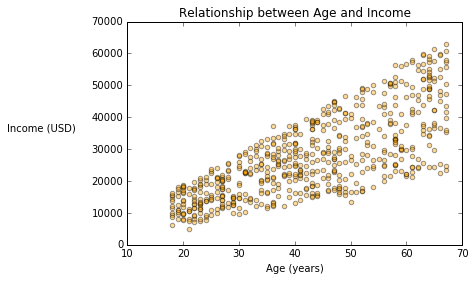

In [86]:
#Scatterplot for age x income (original data)

plt.scatter(x = bank_data.age, y = bank_data.income, c = "orange", alpha=0.4)
plt.title("Relationship between Age and Income")
plt.xlabel("Age (years)")
plt.ylabel("Income (USD)", rotation = 0, labelpad = 50)
plt.show

#### Question 9: Create histograms for (non-normalized) income (using 9 bins) and Age (using 15 bins)

<function matplotlib.pyplot.show>

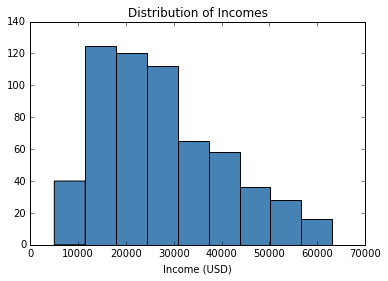

In [88]:
#Histogram for income (original data)
plt.hist(x=bank_data.income, bins=9, color="steelblue")
plt.xlabel("Income (USD)")
plt.title("Distribution of Incomes")
plt.show

<function matplotlib.pyplot.show>

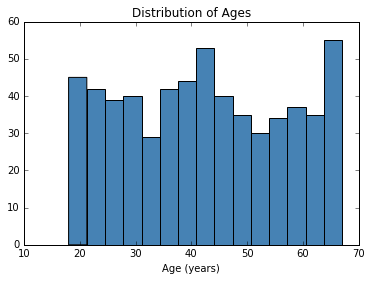

In [90]:
#Histogram for age (original data)
plt.hist(x=bank_data.age, bins=15, color="steelblue")
plt.xlabel("Age (years)")
plt.title("Distribution of Ages")
plt.show

#### Question 10: Using a bargraph, plot the distribution of the values of the region attribute

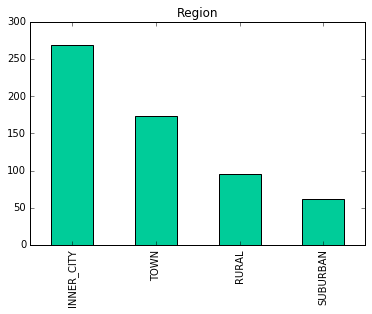

In [115]:
#Already done ;p
bank_data['region'].value_counts().plot(kind='bar', title = 'Region', color="#00cc99")

#### Question 11: Perform crosstabs of region and pep attributes. Show results as a 4x2 table (region x pep). Then plot to show relationship

In [99]:
#The crosstab
region_pep_crosstab = pd.crosstab(bank_data.region, bank_data.pep)
region_pep_crosstab

pep,NO,YES
region,,
INNER_CITY,146,123
RURAL,50,46
SUBURBAN,28,34
TOWN,102,71


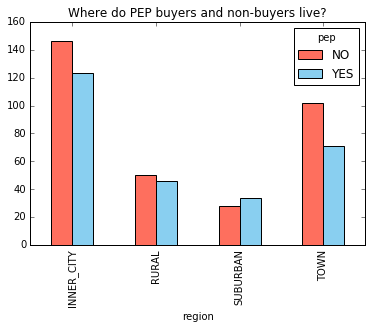

In [114]:
#The graph
region_pep_crosstab.plot(kind = "bar", title = "Where do PEP buyers and non-buyers live?", color = ["#fe6f5e", "#89cff0"])